***Step 1: Import Required Libraries***

***Explanation:***

We import essential Python libraries for data manipulation, visualization, and modeling. This ensures all tools required for analysis and modeling are available.

In [4]:
!pip install ydata-profiling # Install the ydata-profiling package

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b0773578a03a773228e816f0518d5caa5133e05819a6d62dda054cfd4c2b099
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [5]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import plotly.express as px
from pandas_profiling import ProfileReport


<ipython-input-5-ade1f4263d2c>:15: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


**Step 2: Load the Datasets**

***Explanation:***

We load the preprocessed datasets for Ride Pricing and Delivery Pricing into Pandas DataFrames and check their structure.

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving cleaned_Ride_Pricing.csv to cleaned_Ride_Pricing.csv


In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving cleaned_Delivery_Pricing.csv to cleaned_Delivery_Pricing.csv


In [10]:
import pandas as pd

# Load datasets
try:
    # Ensure the filenames match exactly
    ride_data = pd.read_csv('cleaned_Ride_Pricing.csv')
    delivery_data = pd.read_csv('cleaned_Delivery_Pricing.csv')

    # Display basic information about datasets
    print("Ride Pricing Dataset Info:")
    print(ride_data.info())
    print("\nDelivery Pricing Dataset Info:")
    print(delivery_data.info())
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure the files are uploaded with correct names.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")




Ride Pricing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_id                10000 non-null  float64
 1   pickup_latitude        10000 non-null  float64
 2   pickup_longitude       10000 non-null  float64
 3   dropoff_latitude       10000 non-null  float64
 4   dropoff_longitude      10000 non-null  float64
 5   trip_distance_km       10000 non-null  float64
 6   trip_duration_min      10000 non-null  float64
 7   base_fare              10000 non-null  float64
 8   surge_multiplier       0 non-null      float64
 9   time_of_day            0 non-null      float64
 10  day_of_week            10000 non-null  object 
 11  weather_condition      10000 non-null  object 
 12  vehicle_type           10000 non-null  object 
 13  traffic_index          10000 non-null  float64
 14  pickup_location_type   10000

**Step 3: Exploratory Data Analysis (EDA)**

***Explanation:***

Perform an initial exploration of the datasets, including checking for missing values, analyzing distributions of features, and visualizing them.

Dataset: Ride Pricing
Shape: (10000, 20)
Missing Values:
trip_id                      0
pickup_latitude              0
pickup_longitude             0
dropoff_latitude             0
dropoff_longitude            0
trip_distance_km             0
trip_duration_min            0
base_fare                    0
surge_multiplier         10000
time_of_day              10000
day_of_week                  0
weather_condition            0
vehicle_type                 0
traffic_index                0
pickup_location_type         0
dropoff_location_type        0
tolls                        0
cancellation_fee         10000
passenger_count              0
total_fare                   0
dtype: int64

Summary Statistics:
            trip_id  pickup_latitude  pickup_longitude  dropoff_latitude  \
count  10000.000000     1.000000e+04      1.000000e+04      1.000000e+04   
mean       0.000000    -1.989520e-17      2.700062e-17      4.263256e-18   
std        1.000000     1.000000e+00      1.000000e+00      1

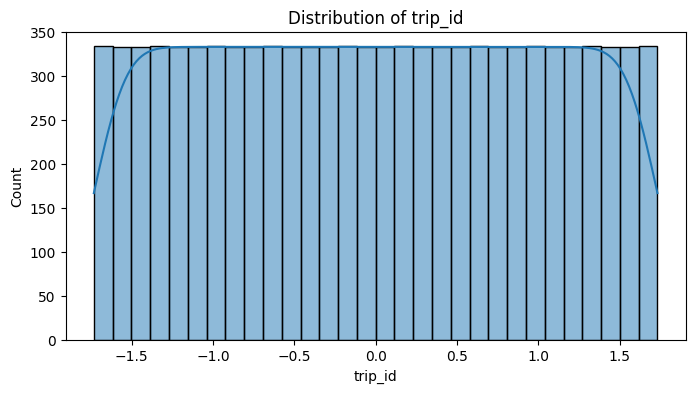

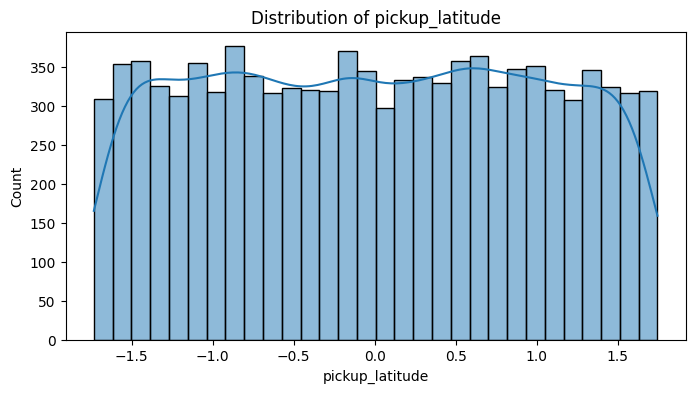

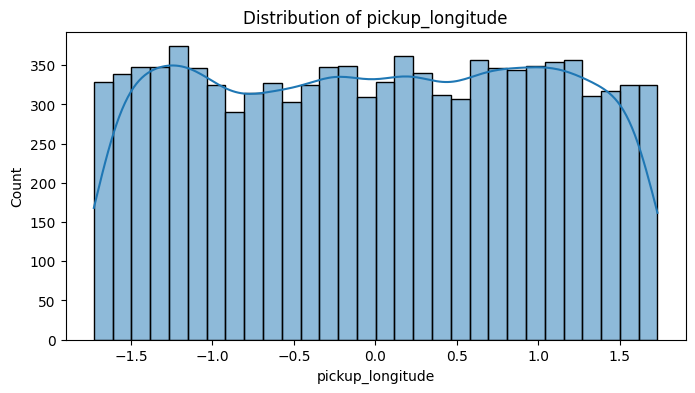

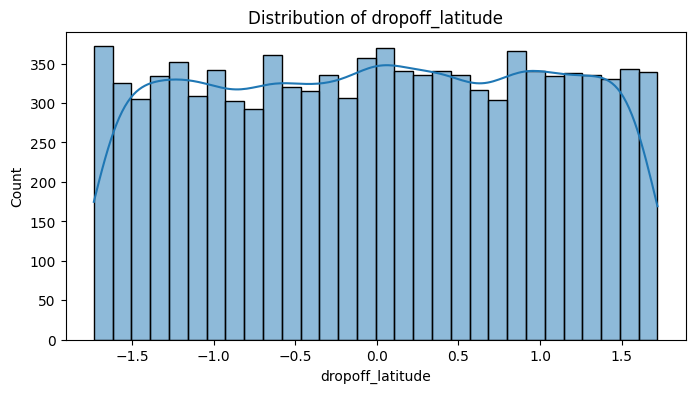

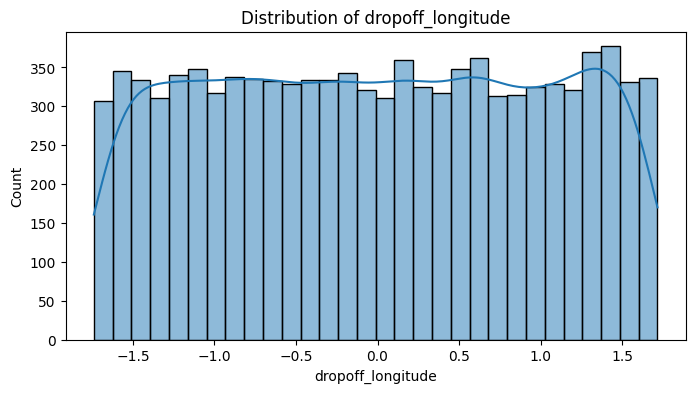

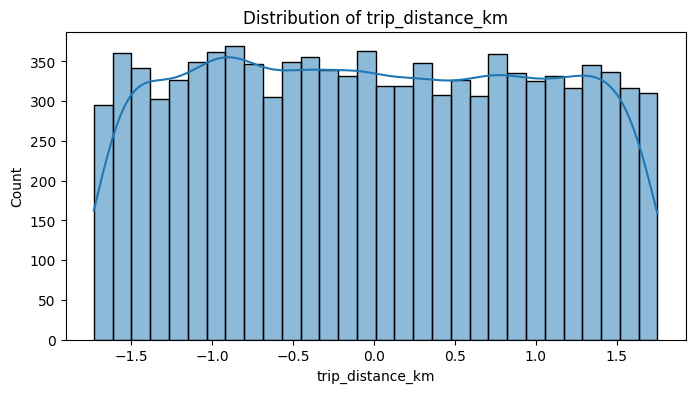

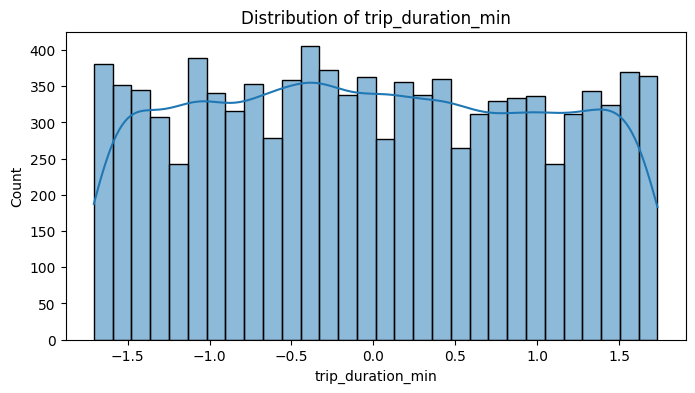

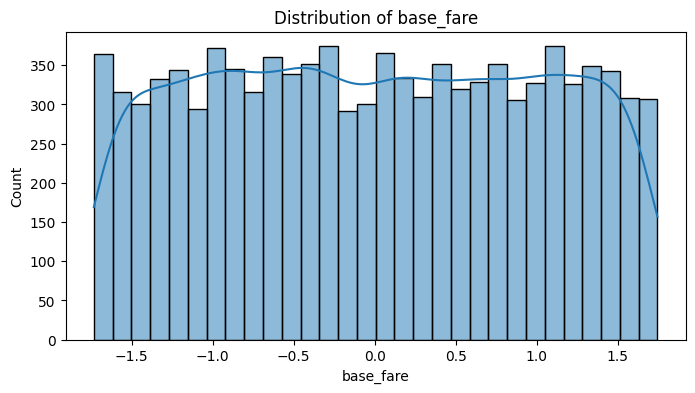

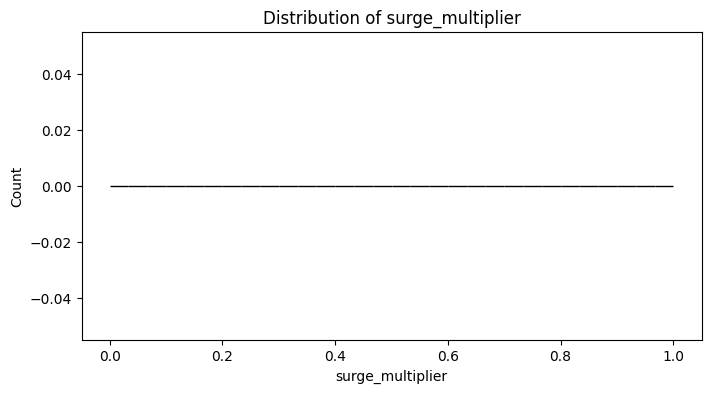

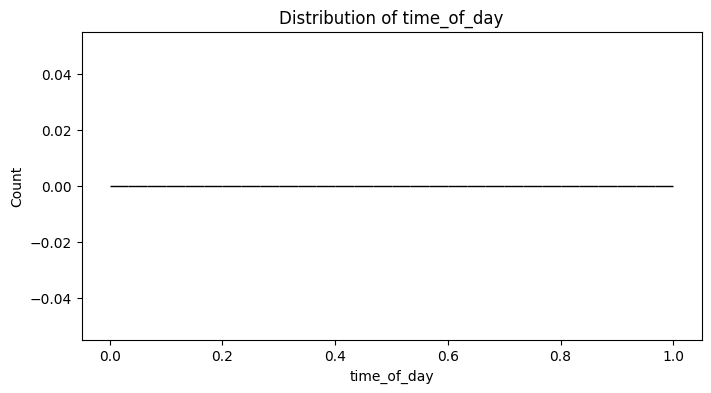

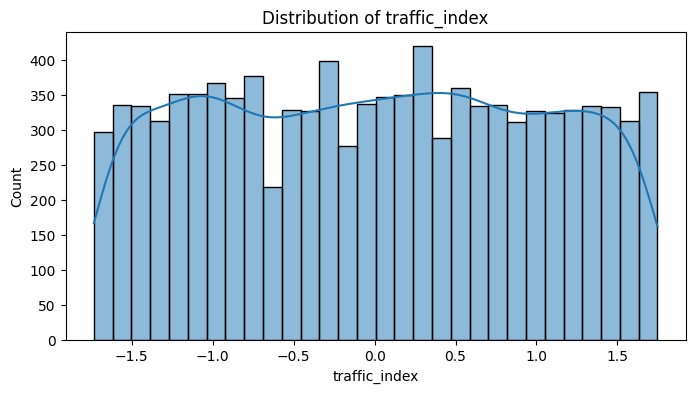

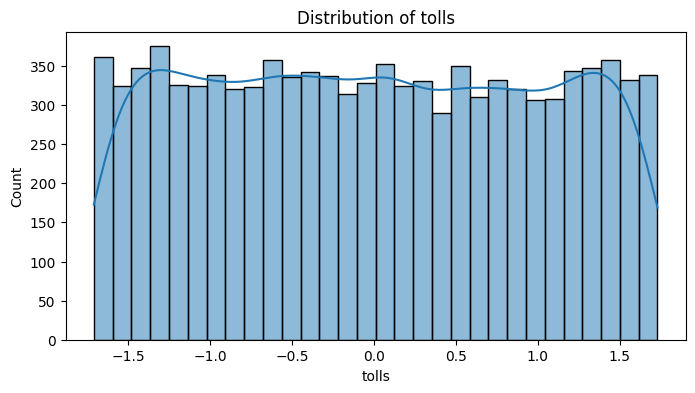

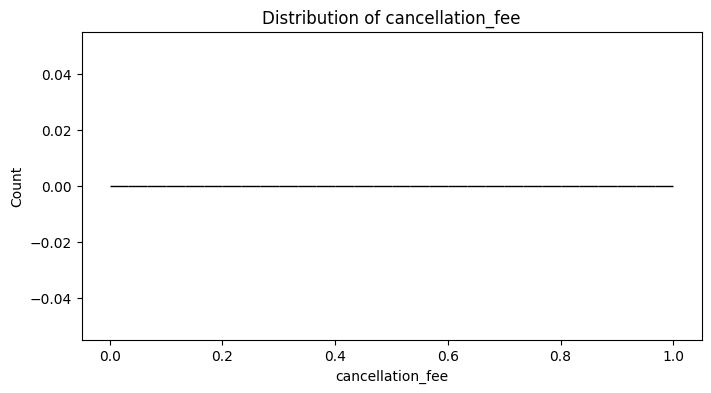

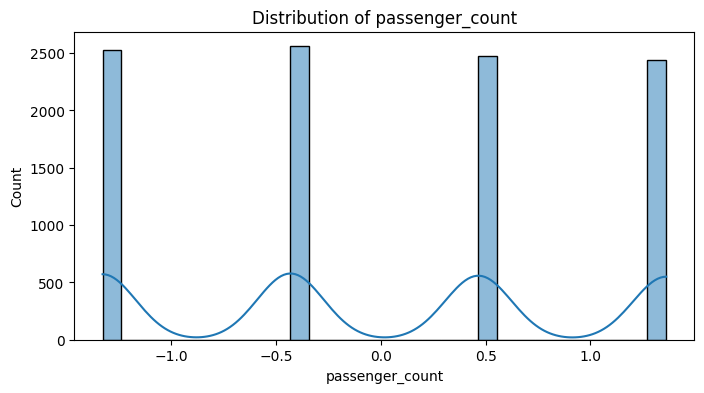

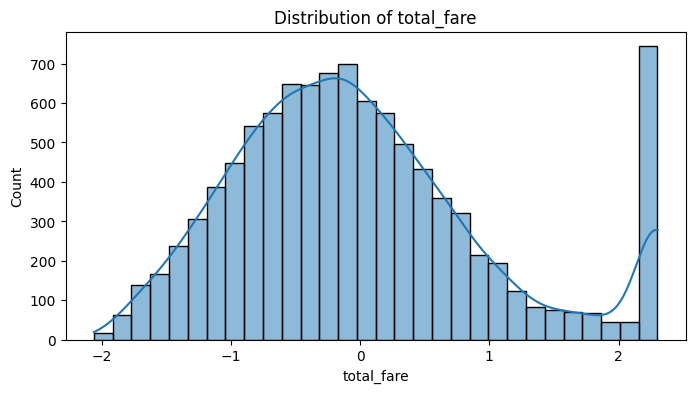

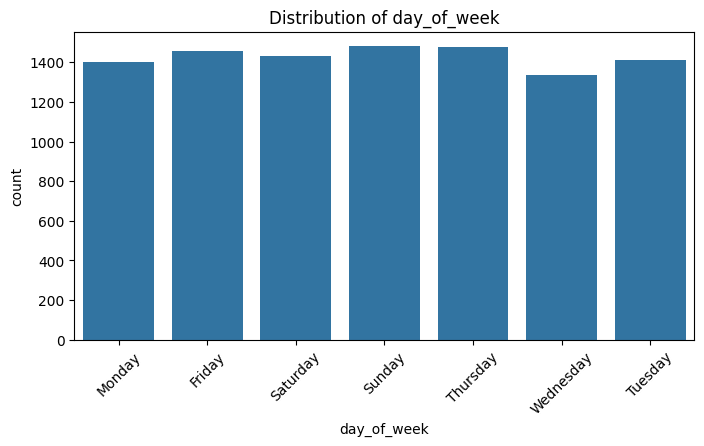

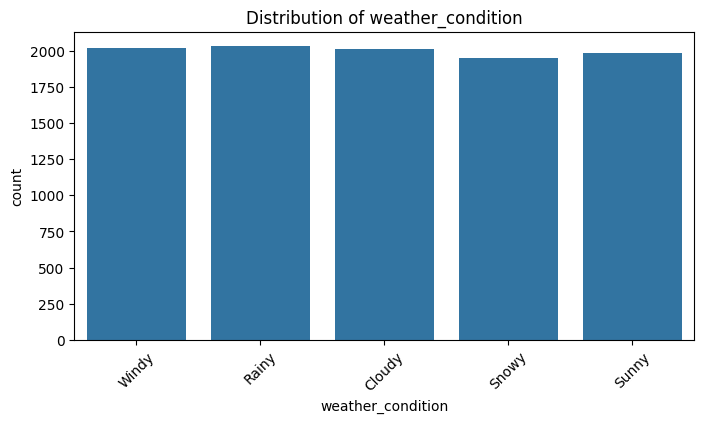

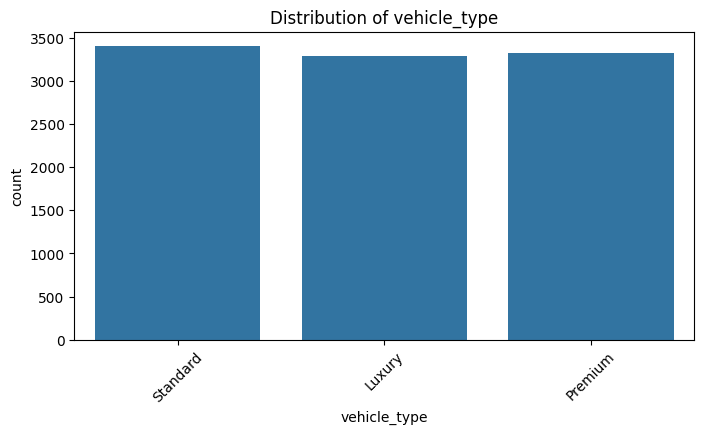

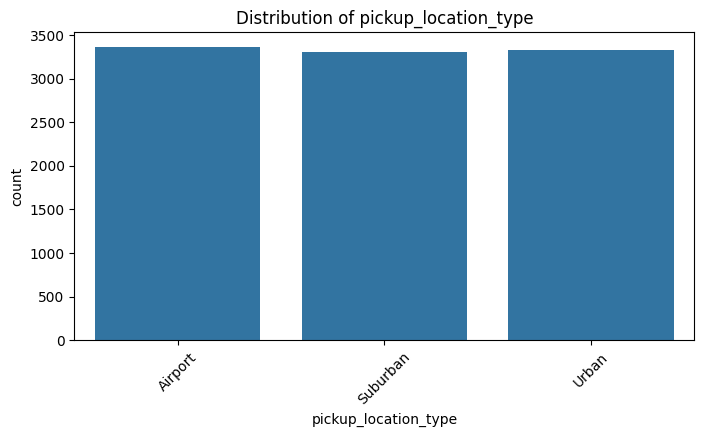

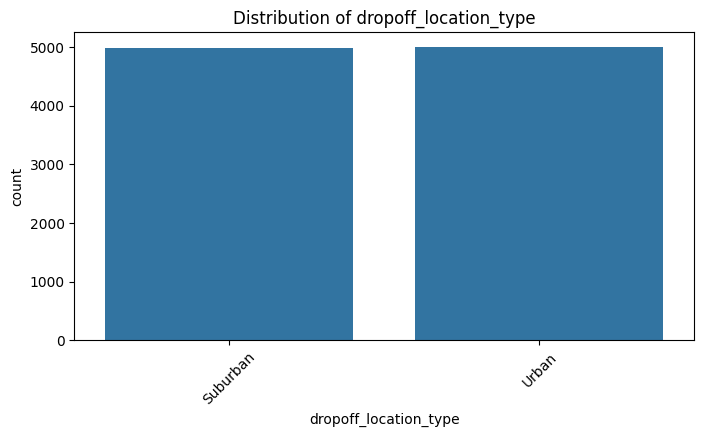

Dataset: Delivery Pricing
Shape: (10000, 20)
Missing Values:
Delivery_ID               0
Pickup_Latitude           0
Pickup_Longitude          0
Dropoff_Latitude          0
Dropoff_Longitude         0
Delivery_Distance_km      0
Package_Weight_kg         0
Delivery_Time_Est_min     0
Order_Value               0
Platform_Fees             0
Time_of_Day               0
Day_of_Week               0
Weather_Condition         0
Delivery_Type             0
Traffic_Index             0
Delivery_Location_Type    0
Discount_Applied          0
Surge_Multiplier          0
Fuel_Cost                 0
Total_Delivery_Fee        0
dtype: int64

Summary Statistics:
       Delivery_ID  Pickup_Latitude  Pickup_Longitude  Dropoff_Latitude  \
count  10000.00000     10000.000000      10000.000000      10000.000000   
mean    5000.50000        -0.325549          0.045223          0.465036   
std     2886.89568        51.849577        103.932350         51.795366   
min        1.00000       -89.923759       -17

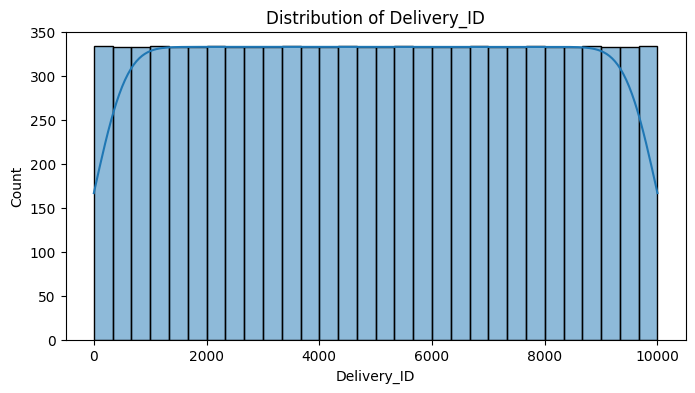

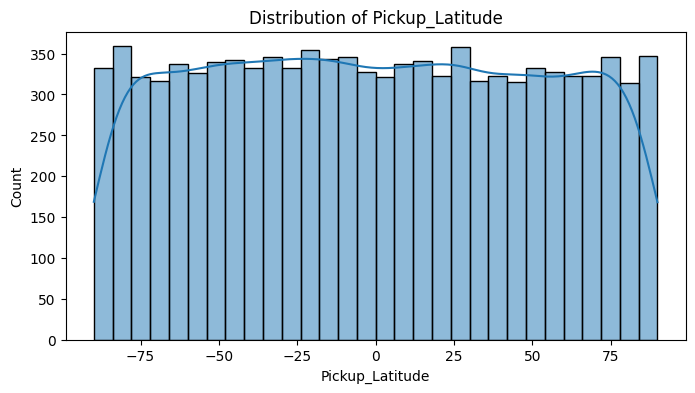

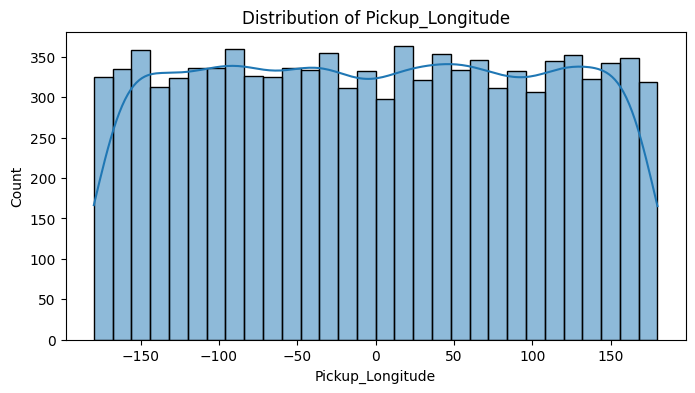

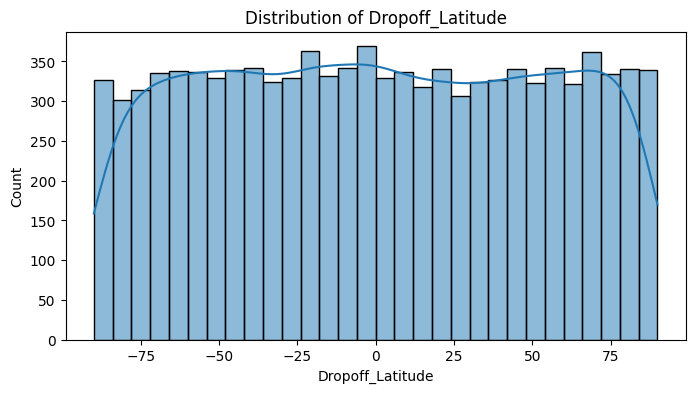

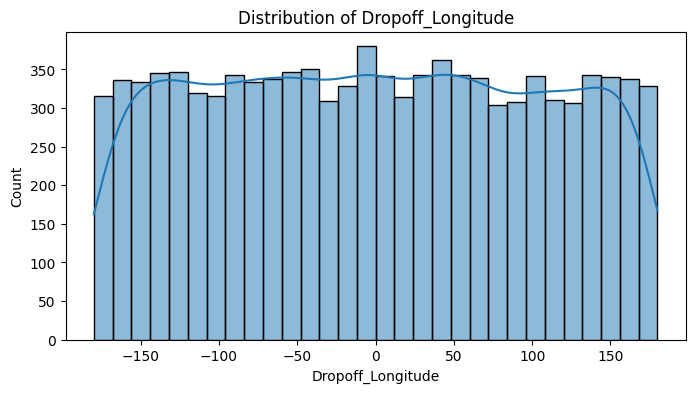

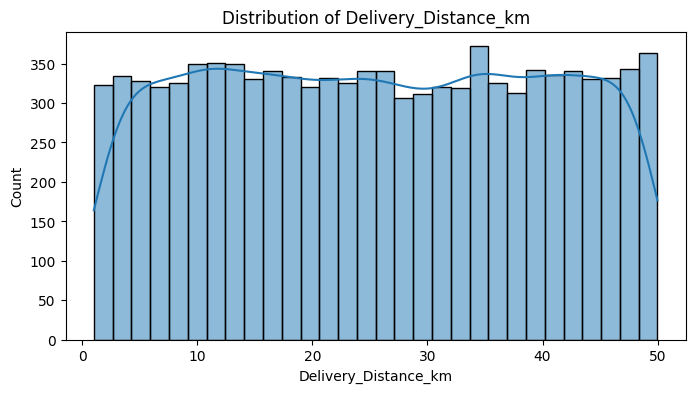

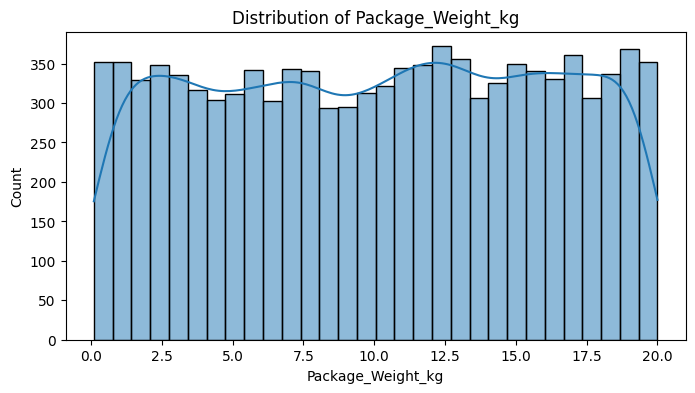

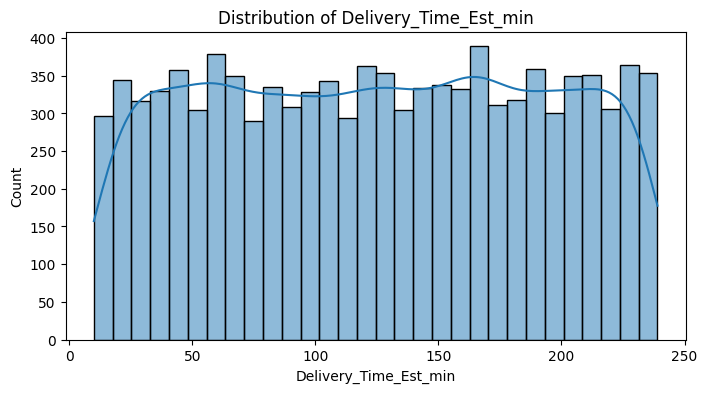

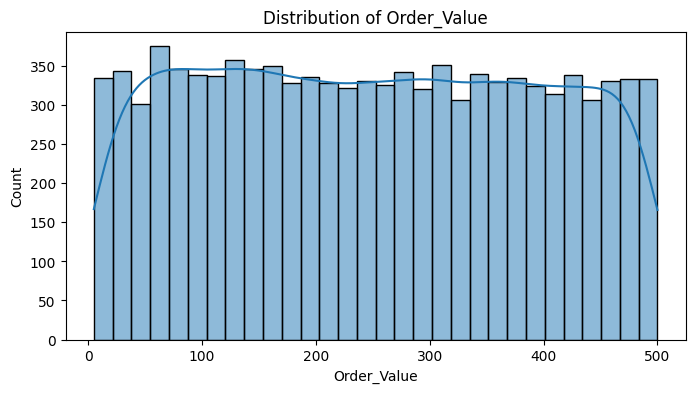

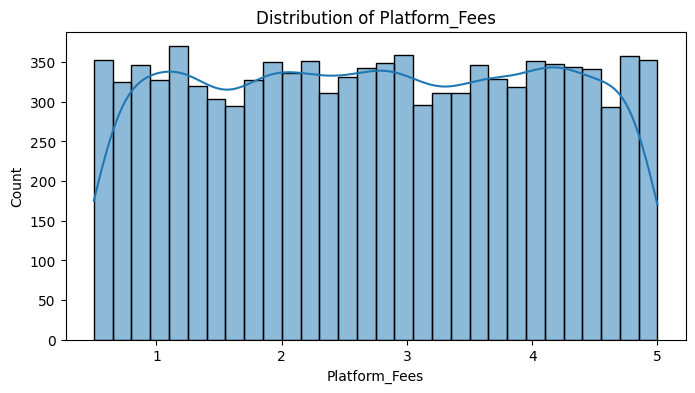

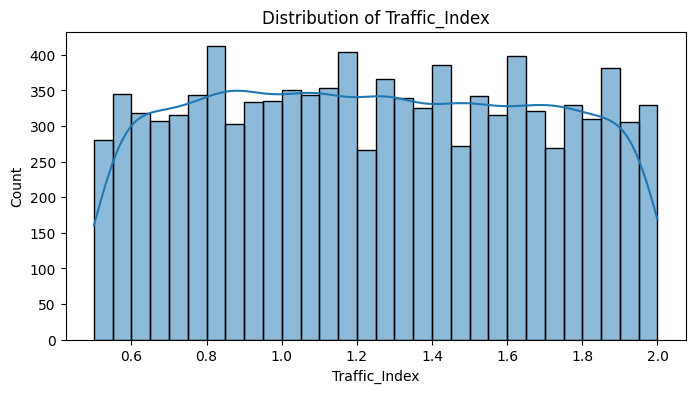

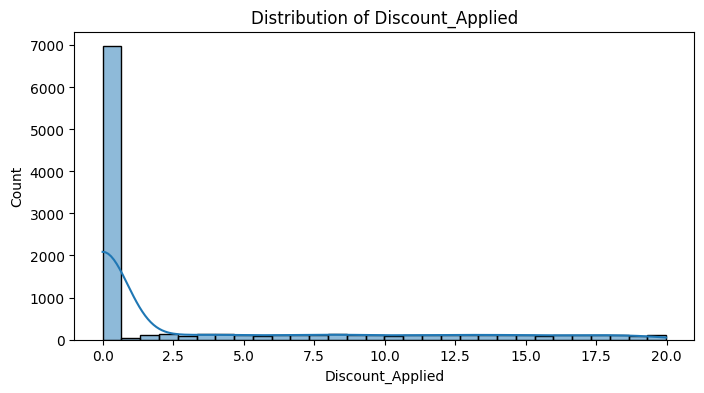

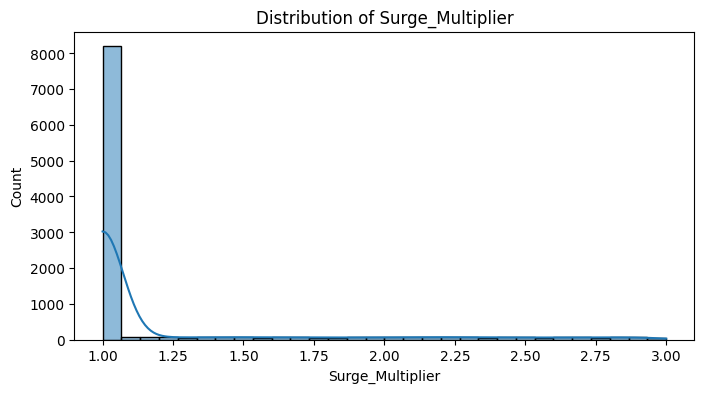

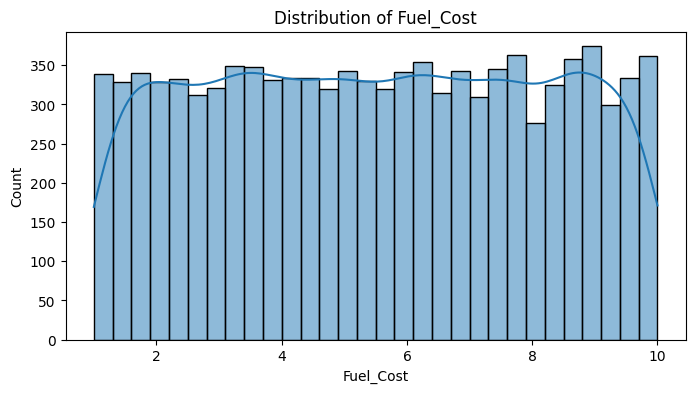

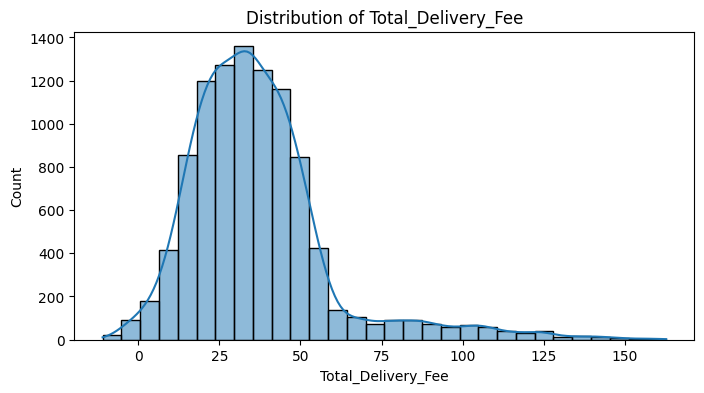

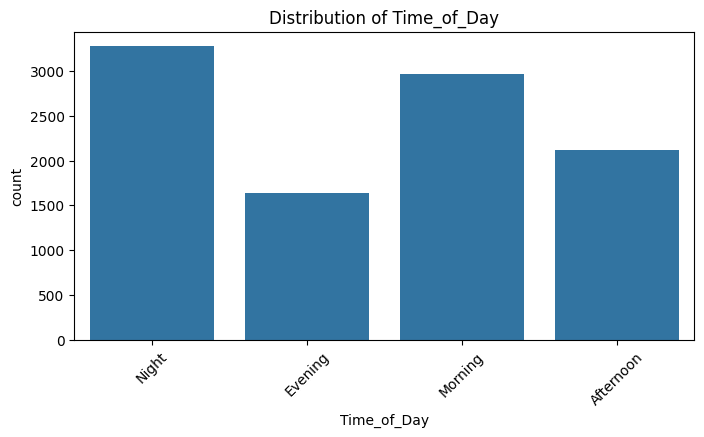

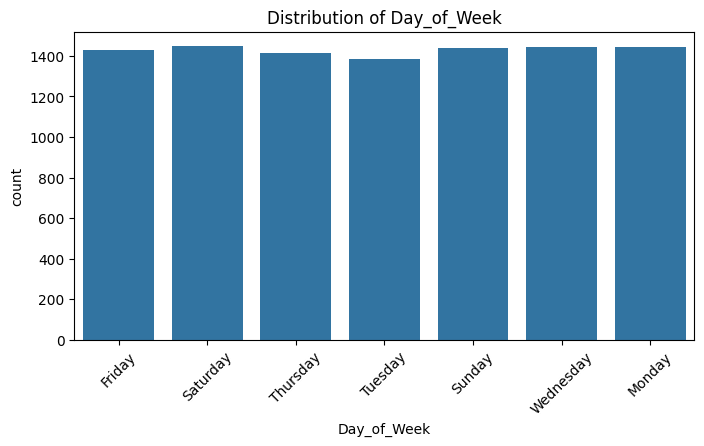

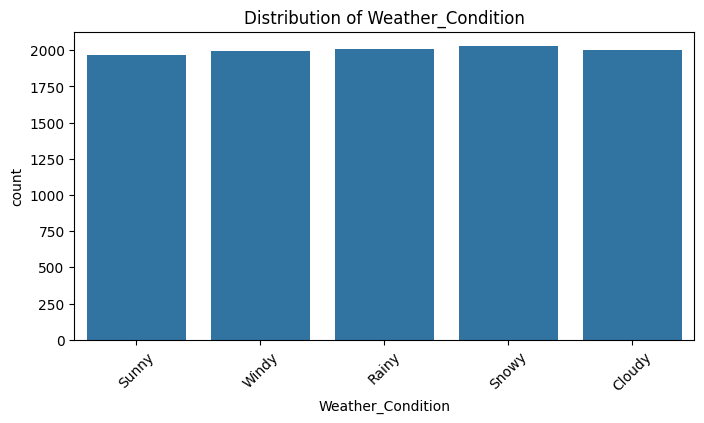

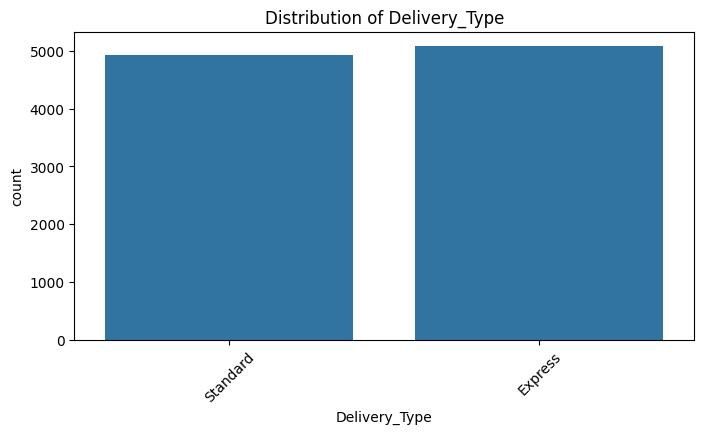

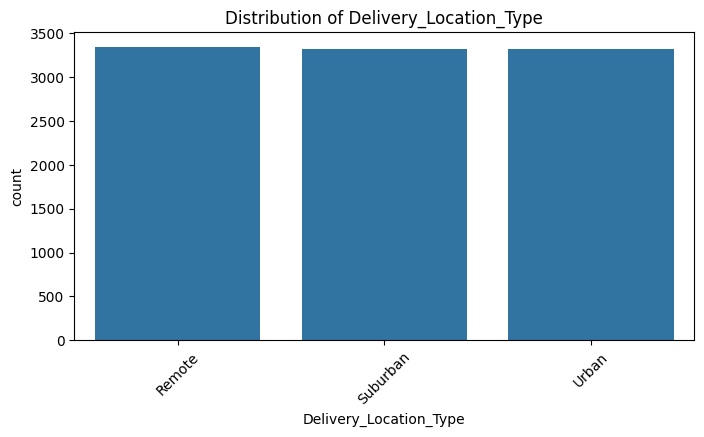

In [11]:
# Step 3: Exploratory Data Analysis (EDA)
def perform_eda(df, dataset_name):
    print(f"Dataset: {dataset_name}")
    print("Shape:", df.shape)
    print("Missing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe())

    # Visualize distributions of numerical features
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()

    # Visualize distributions of categorical features
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

# Perform EDA
perform_eda(ride_data, "Ride Pricing")
perform_eda(delivery_data, "Delivery Pricing")


***Step4:  Handling Missing Values***

**Explanation**

Missing values can distort analysis or modeling. We fill missing values using median imputation as it's robust to outliers.

In [13]:
# Step 4: Handle Missing Values
# Select only numerical columns for median calculation
numeric_cols = ride_data.select_dtypes(include=np.number).columns
ride_data[numeric_cols] = ride_data[numeric_cols].fillna(ride_data[numeric_cols].median())

# Similarly, for delivery_data
numeric_cols_delivery = delivery_data.select_dtypes(include=np.number).columns
delivery_data[numeric_cols_delivery] = delivery_data[numeric_cols_delivery].fillna(delivery_data[numeric_cols_delivery].median())


**Step 5: Time Series Analysis**

***Explanation:***

Analyze temporal patterns in data, such as trends and seasonality, to understand time-dependent variations.

**Based on the column names in both datasets, the most suitable target columns are as follows:**


***Ride Pricing Dataset:***

**Recommended Target Column**:
 total_fare (represents the final price of the ride, which is typically predicted in ride-pricing models)

**Reason:** It's a comprehensive outcome that incorporates various factors like base fare, surge multiplier, distance, and other features.

**Delivery Pricing Dataset:**

***Recommended Target Column:***
Total_Delivery_Fee (represents the total delivery fee, the typical target for delivery pricing models).

**Reason**: It's the aggregated result of several inputs, including platform fees, surge multiplier, fuel costs, and others.

In [14]:
# Step 5: Time Series Analysis
def time_series_analysis(df, date_col, total_fare,Total_Delivery_Fee, dataset_name):
    df[date_col] = pd.to_datetime(df[date_col])
    df.set_index(date_col, inplace=True)
    df[target_col].plot(figsize=(10, 6), title=f"{dataset_name} Time Series Analysis")
    plt.show()
    sm.tsa.seasonal_decompose(df[total_fare,Total_Delivery_Fee], model='additive').plot()
    plt.show()


**Step 6: Bivariate Analysis**

***Explanation:***

Explore relationships between two variables using scatter plots and compute correlations for numerical features.

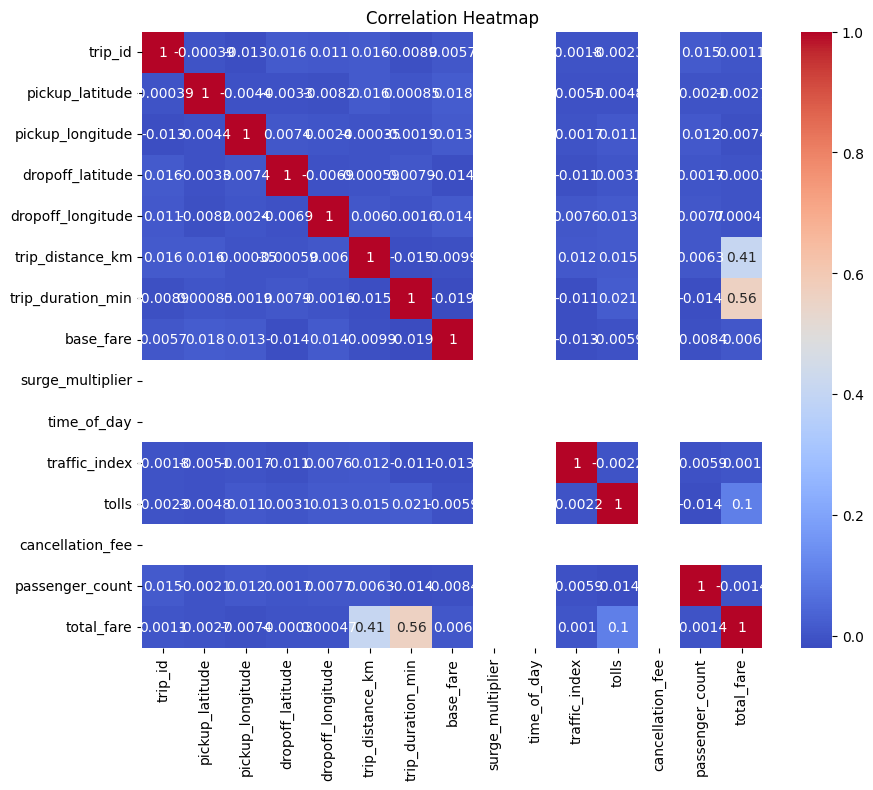

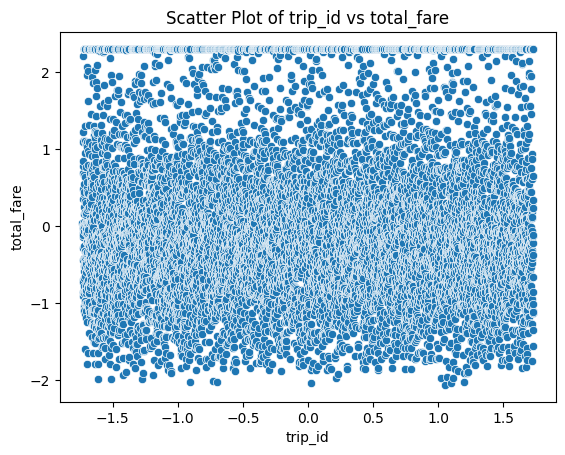

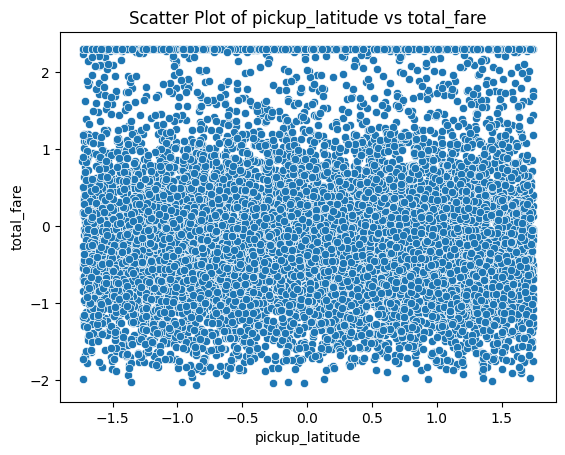

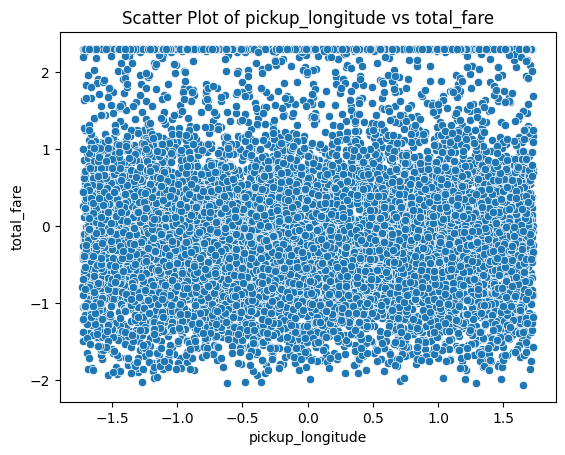

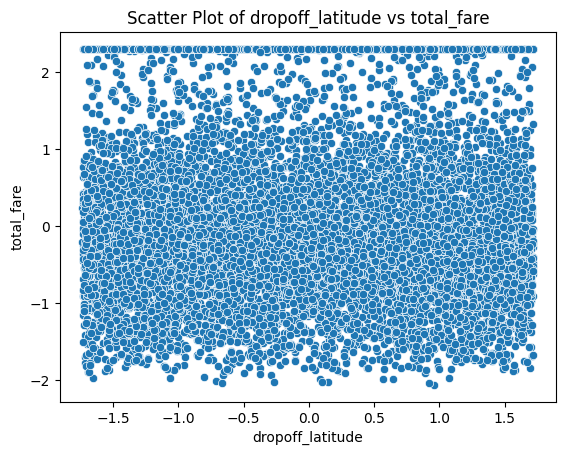

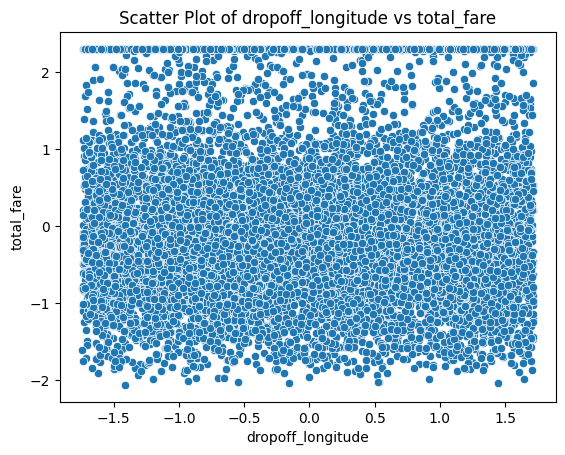

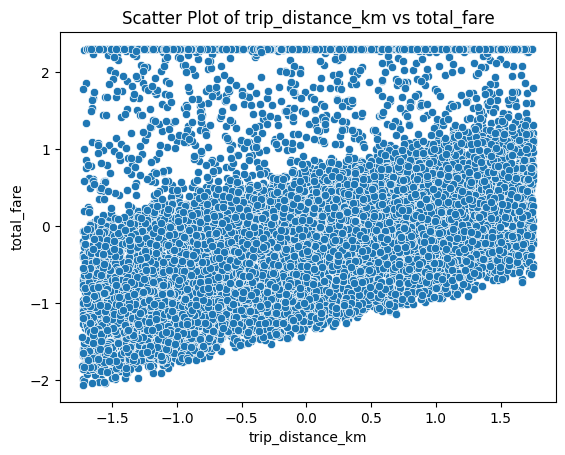

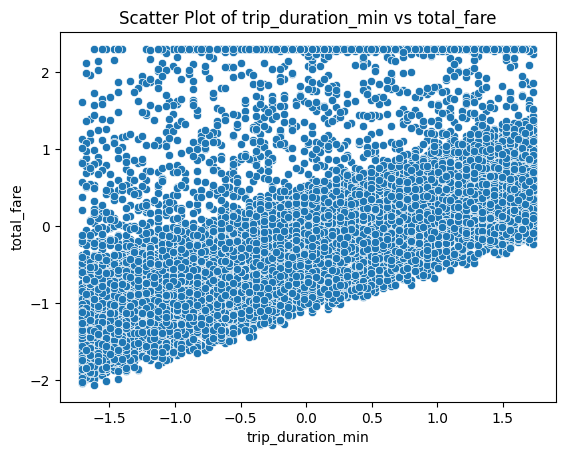

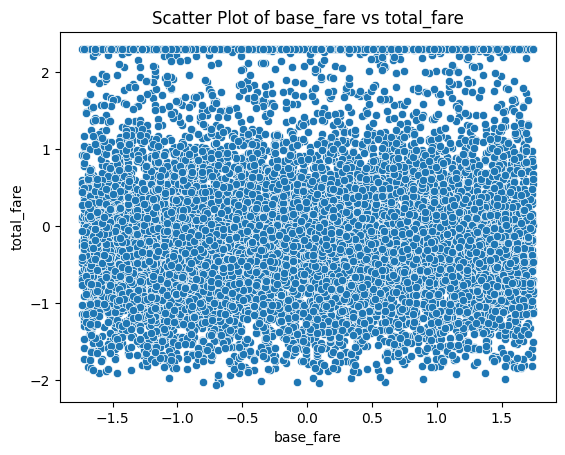

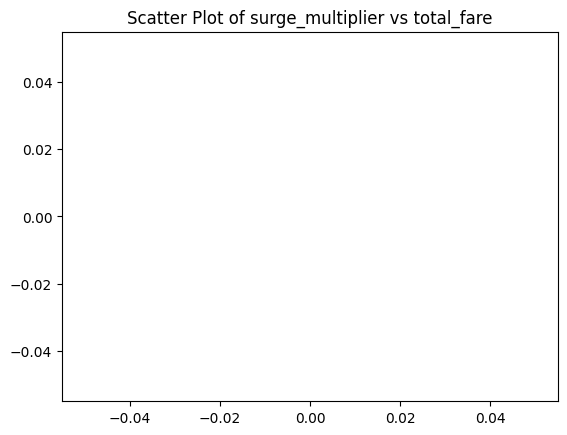

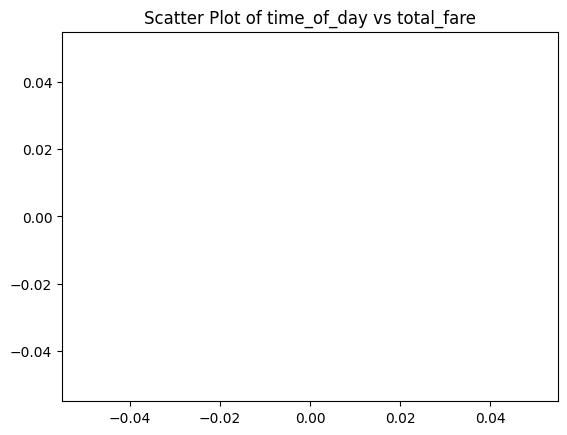

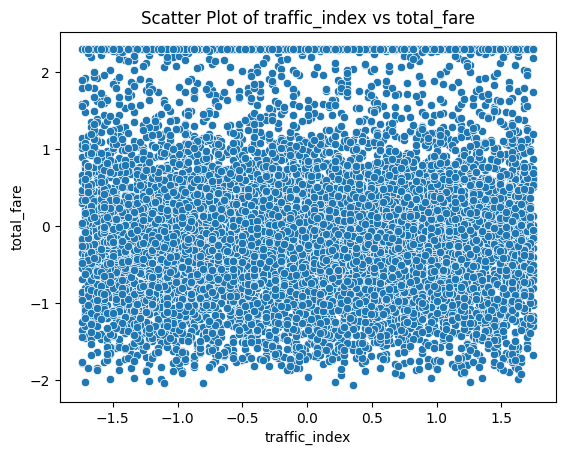

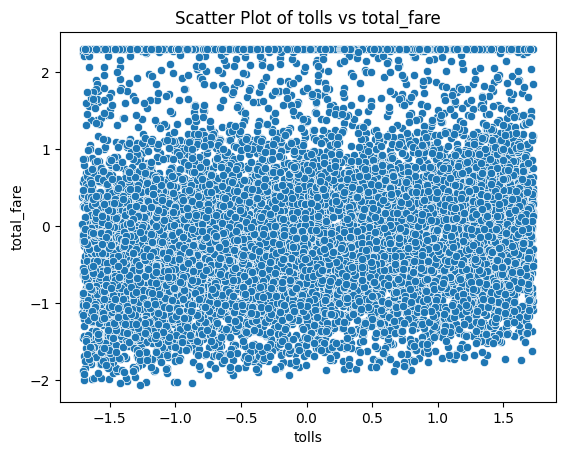

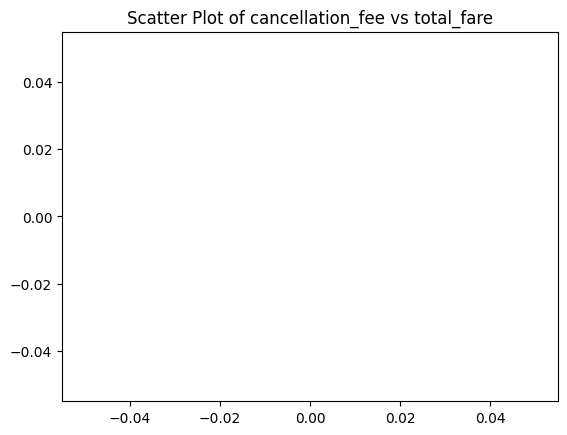

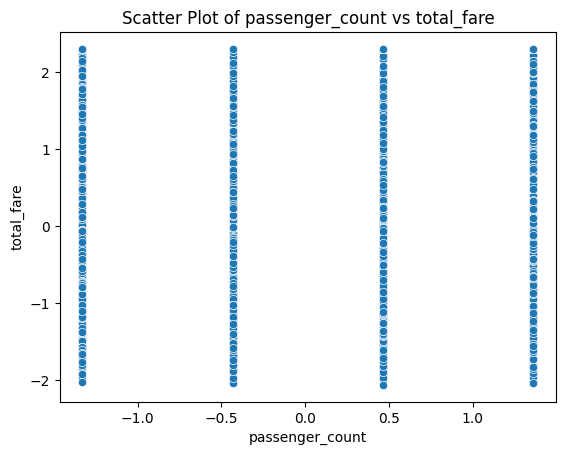

In [23]:
def bivariate_analysis(df, total_fare, Total_Delivery_Fee):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    for col in numeric_cols:
        if col != total_fare and col != Total_Delivery_Fee:
            if total_fare in df.columns:
                sns.scatterplot(data=df, x=col, y=total_fare)
                plt.title(f"Scatter Plot of {col} vs {total_fare}")
                plt.show()
            if Total_Delivery_Fee in df.columns:
                sns.scatterplot(data=df, x=col, y=Total_Delivery_Fee)
                plt.title(f"Scatter Plot of {col} vs {Total_Delivery_Fee}")
                plt.show()

bivariate_analysis(ride_data, 'total_fare', 'Total_Delivery_Fee')


**Step 7: Multivariate Analysis**

***Explanation:***

Visualize interactions between multiple features using PCA and t-SNE for dimensionality reduction

Non-numeric columns: Index(['day_of_week', 'weather_condition', 'vehicle_type',
       'pickup_location_type', 'dropoff_location_type'],
      dtype='object')


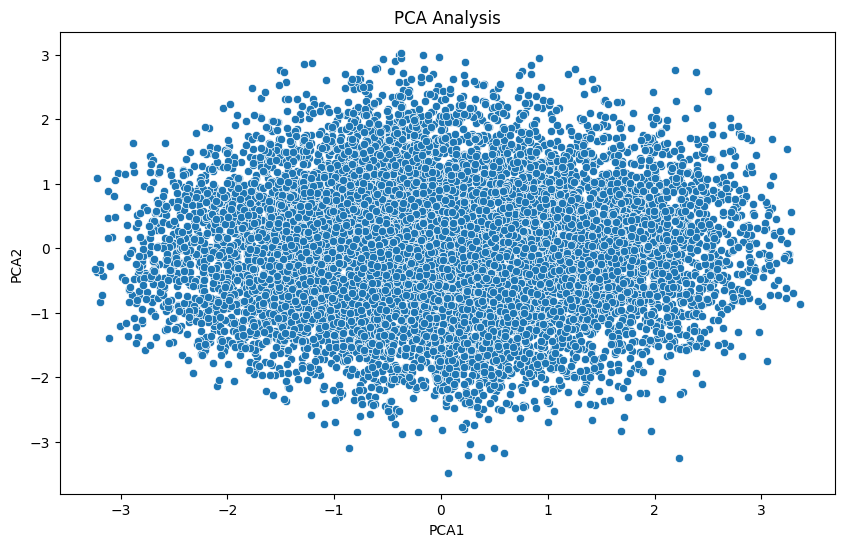

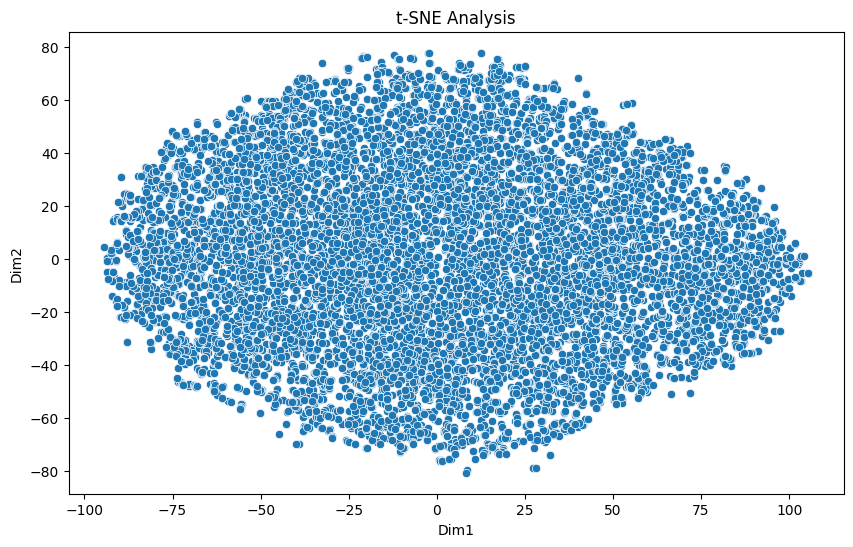

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

def multivariate_analysis(df):
    # Check for non-numeric columns
    non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
    print("Non-numeric columns:", non_numeric_cols)

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True, dummy_na=False)

    # Drop columns with all missing values before imputation
    df_encoded = df_encoded.dropna(axis=1, how='all')

    # Handle missing values using SimpleImputer
    numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
    df_encoded[numeric_cols] = imputer.fit_transform(df_encoded[numeric_cols])  # Impute missing values

    # Check if cleaned data has rows left
    if df_encoded.empty:
        print("The dataset is empty after handling missing values. Please investigate the data.")
        return

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_encoded[numeric_cols])
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2')
    plt.title("PCA Analysis")
    plt.show()

    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(df_encoded[numeric_cols])
    tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2')
    plt.title("t-SNE Analysis")
    plt.show()

multivariate_analysis(ride_data)
